# 16_heirarchical_clustering


Heirachical clustering is a method for grouping data into disjoint subsets of similar data. 
It is a non-parametric method that is used when the number of clusters is not known in advance. 
It is also used to find clusters in data that is not normally distributed.

### Heirarchical Clustering with Agglomerative Clustering

Silhouette Score: 0.458110539604395
Adjusted Rand Index: 0.27164846504428586
Normalized Mutual Information: 0.6061861635033785


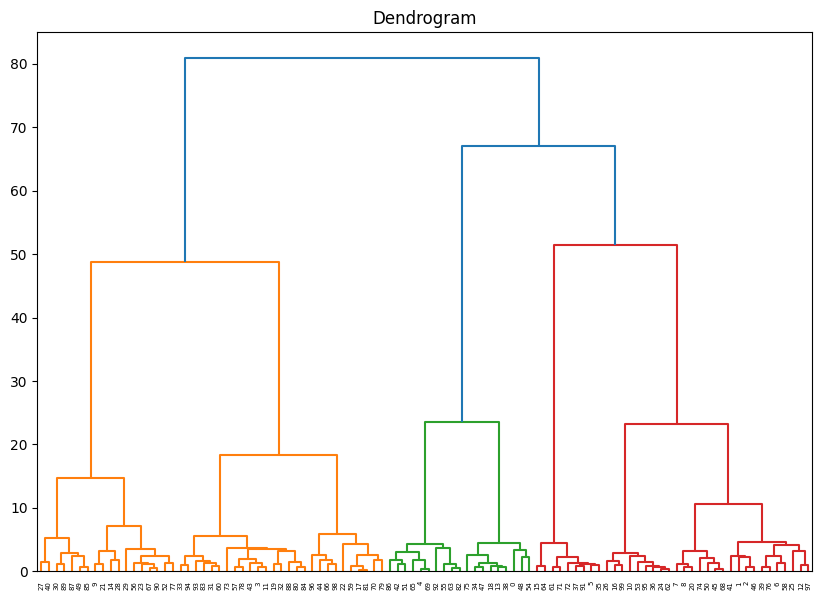

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.datasets import make_blobs
from sklearn import metrics
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# Generate a random dataset with 100 samples and 3 features
X, y = make_blobs(n_samples=100, centers=11, n_features=3, random_state=42)

# Perform hierarchical clustering with the AgglomerativeClustering algorithm
model = AgglomerativeClustering(n_clusters=3, linkage='ward')  # Removed metric='euclidean'

# Fit the clustering model to the data
model.fit(X)

# Evaluate the model
sil_score = silhouette_score(X, model.labels_)  # Renamed to avoid function name conflict
ari_score = adjusted_rand_score(y, model.labels_)
nmi_score = normalized_mutual_info_score(y, model.labels_)

# Print evaluation metrics
print("Silhouette Score:", sil_score)
print("Adjusted Rand Index:", ari_score)
print("Normalized Mutual Information:", nmi_score)

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()  # Removed extra comma

### Heirarchical Clustering with Agglomerative Clustering on Tips Dataset

Silhouette Score: 0.49990168085883485


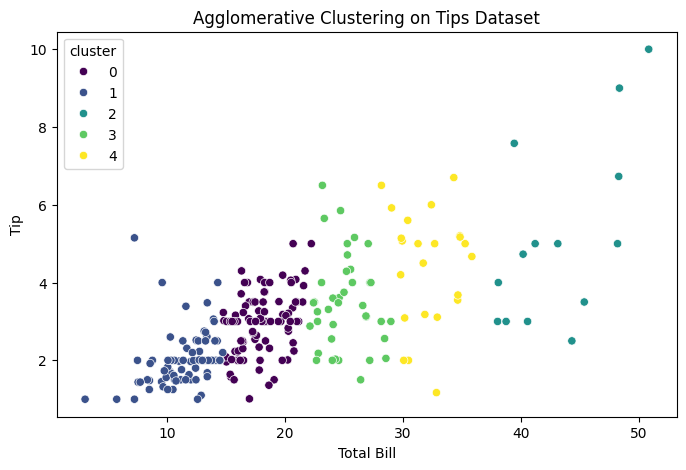

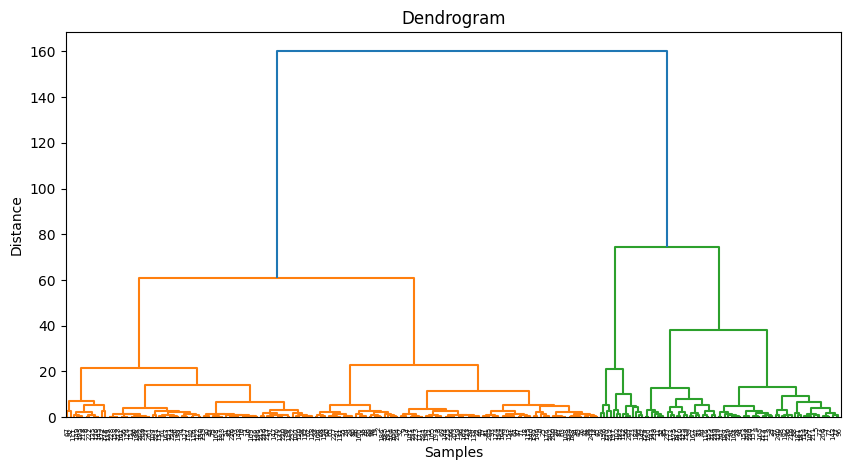

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

# Load the tips dataset from seaborn
df = sns.load_dataset('tips')

# Select relevant features for clustering
features = ['total_bill', 'tip']
X = df[features]

# Perform Agglomerative clustering
n_clusters = 5  # Number of clusters
model = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the model to the data
agg_labels = model.fit_predict(X)

# Add cluster labels to the dataset
df['cluster'] = agg_labels

# Evaluate the clustering using silhouette score
sil_score = silhouette_score(X, agg_labels)
print("Silhouette Score:", sil_score)

# Visualize the clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='total_bill', y='tip', hue='cluster', palette='viridis')
plt.title('Agglomerative Clustering on Tips Dataset')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

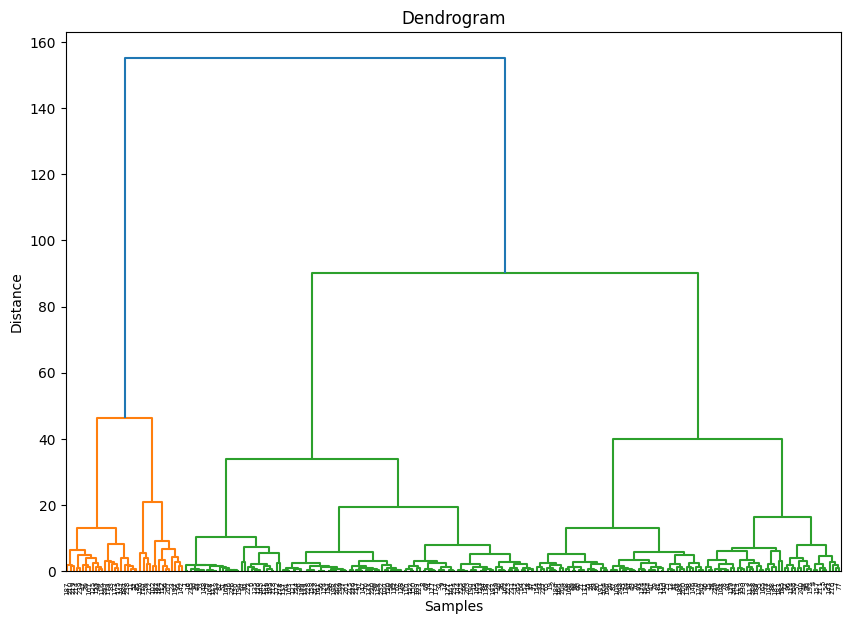

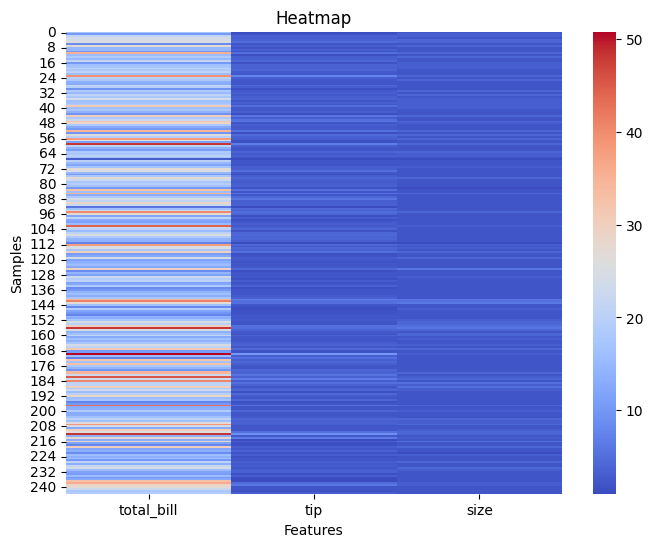

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the tips dataset from seaborn
tips = sns.load_dataset('tips')

# Select relevant features for clustering
features = ['total_bill', 'tip', 'size']

# Extract the selected features from the dataset
X = tips[features]

# Compute the linkage matrix
linkage_matrix = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(X, cmap='coolwarm')
plt.title('Heatmap')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()


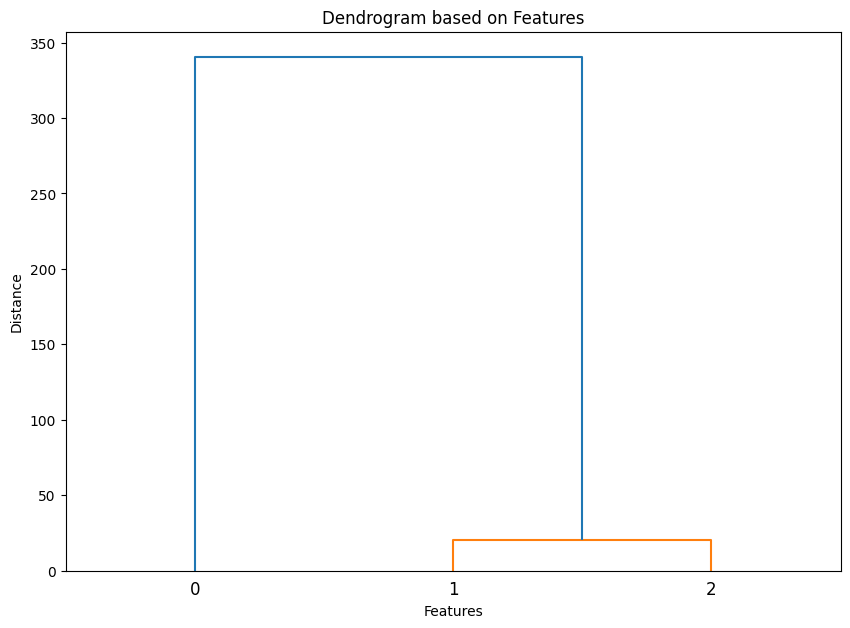

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the tips dataset from seaborn
tips = sns.load_dataset('tips')

# Select relevant features for clustering
features = ['total_bill', 'tip', 'size']

# Extract the selected features from the dataset
X = tips[features]

# Transpose the data matrix
X_transposed = X.transpose()

# Compute the linkage matrix
linkage_matrix = linkage(X_transposed, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram based on Features')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()


### Hierarchical Clustering with Agglomerative Clustering on Iris Dataset

Silhouette Score: 0.446689041028591


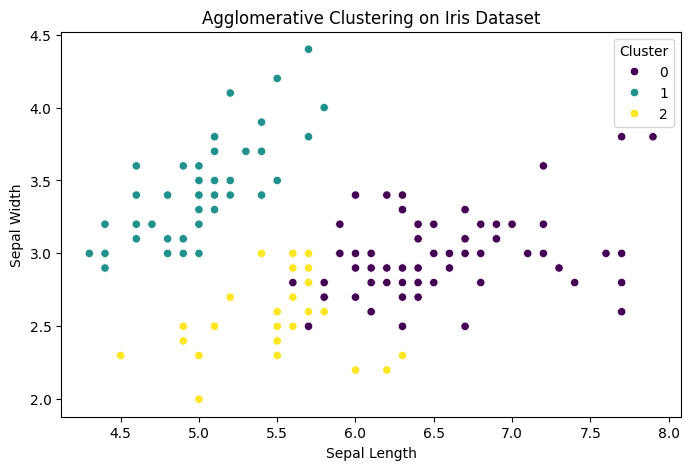

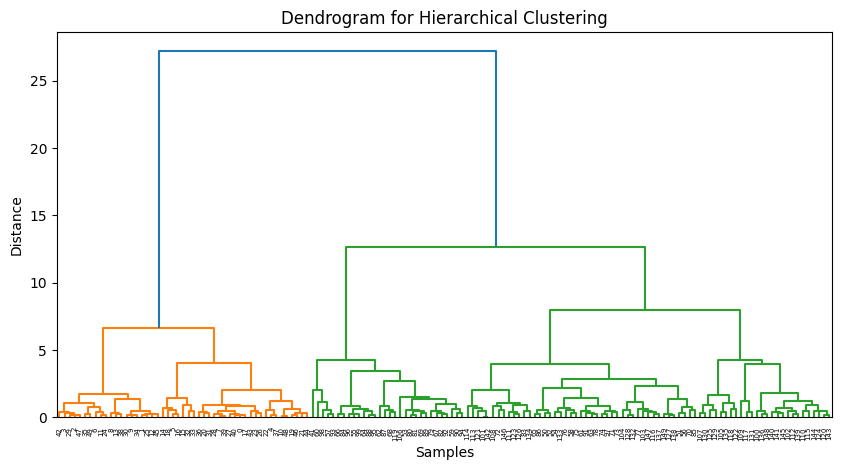

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset from seaborn
df = sns.load_dataset('iris')

# Select only numerical features for clustering (excluding 'species')
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[features]

# Standardize the dataset (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Agglomerative Clustering
n_clusters = 3  # We expect 3 clusters as per the actual species
model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
agg_labels = model.fit_predict(X_scaled)

# Evaluate the clustering using silhouette score
sil_score = silhouette_score(X_scaled, agg_labels)
print("Silhouette Score:", sil_score)

# Add cluster labels to the dataset
df['cluster'] = agg_labels

# Visualize clusters (Using first two features for plotting)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['sepal_length'], y=df['sepal_width'], hue=df['cluster'], palette='viridis')
plt.title('Agglomerative Clustering on Iris Dataset')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title="Cluster")
plt.show()

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage(X_scaled, method='ward'), labels=df.index)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

### Hierarchical Clustering with Agglomerative Clustering on Titanic Dataset

In [85]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [86]:
# load the data
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [90]:
## preprocess the data 
# Remove the deck column
df = df.drop('deck', axis=1)
# impute missing values in age, embarked and embark-town
df['age'] = df['age'].fillna(df['age'].mean())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])
# convert categorical variables to numerical variables using for loop and if else condition
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        df[col] = df[col].astype('category')
        df[col] = df[col].cat.codes

Silhouette Score: 0.505000817854178


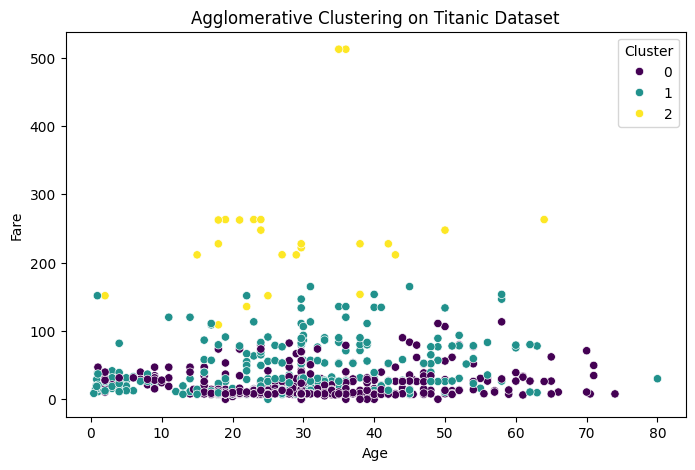

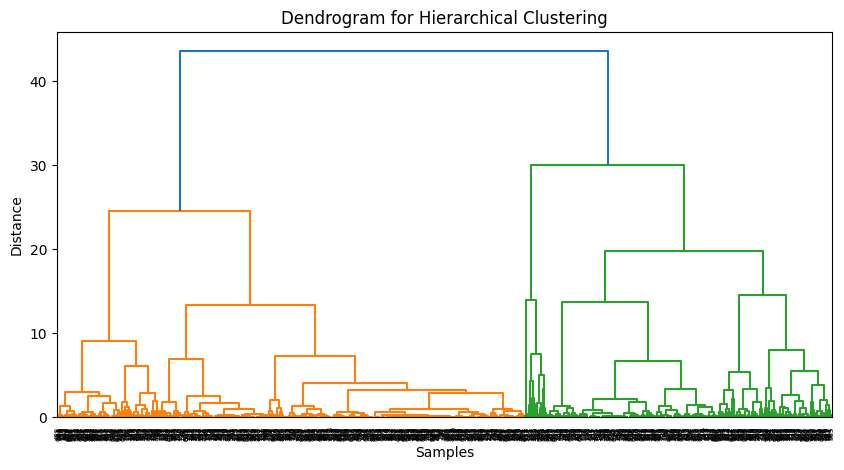

In [98]:
# select features for clustering
features = ['age', 'fare', 'survived']
X = df[features]

# Standardize the dataset (important for clustering)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_labels = model.fit_predict(X_scaled)

# Evaluate the clustering using silhouette score
sil_score = silhouette_score(X_scaled, agg_labels)
print("Silhouette Score:", sil_score)

# Add cluster labels to the dataset
df['cluster'] = agg_labels

# Visualize clusters (Using first two features for plotting)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['age'], y=df['fare'], hue=df['cluster'], palette='viridis')
plt.title('Agglomerative Clustering on Titanic Dataset')
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Cluster")
plt.show()

# Plot the dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(10, 5))
dendrogram(linkage(X_scaled, method='ward'), labels=df.index)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()